<a href="https://colab.research.google.com/github/LyapunovaUN/prog/blob/main/%D0%B0%D0%BB%D0%B322.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inorder обход: [10, 17, 20, 25, 27, 30, 35]
Элемент 27 найден
После удаления 17: [10, 20, 25, 27, 30, 35]


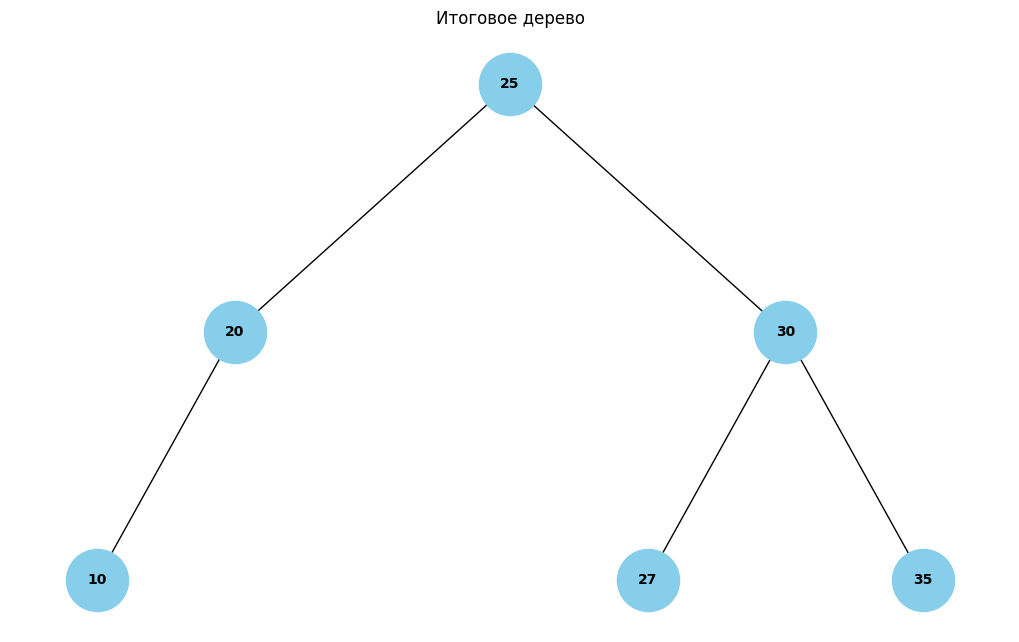


Сортировка кучей:
Исходный массив: [25, 17, 30, 10, 20, 27, 35]
Отсортированный массив: [10, 17, 20, 25, 27, 30, 35]


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key

class BinaryTree:
    def __init__(self):
        self.root = None
        self.graph = nx.DiGraph()
        self.pos = {}

    def insert(self, key):
        if self.root is None:
            self.root = Node(key)
        else:
            self._insert(self.root, key)

    def _insert(self, node, key):
        if key < node.val:
            if node.left is None:
                node.left = Node(key)
            else:
                self._insert(node.left, key)
        else:
            if node.right is None:
                node.right = Node(key)
            else:
                self._insert(node.right, key)

    def search(self, key):
        return self._search(self.root, key)

    def _search(self, node, key):
        if node is None or node.val == key:
            return node
        if key < node.val:
            return self._search(node.left, key)
        return self._search(node.right, key)

    def delete(self, key):
        self.root = self._delete(self.root, key)

    def _delete(self, node, key):
        if node is None:
            return node

        if key < node.val:
            node.left = self._delete(node.left, key)
        elif key > node.val:
            node.right = self._delete(node.right, key)
        else:
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left
            temp = self._min_value_node(node.right)
            node.val = temp.val
            node.right = self._delete(node.right, temp.val)

        return node

    def _min_value_node(self, node):
        current = node
        while current.left is not None:
            current = current.left
        return current

    def inorder(self):
        return self._inorder(self.root, [])

    def _inorder(self, node, result):
        if node:
            self._inorder(node.left, result)
            result.append(node.val)
            self._inorder(node.right, result)
        return result

    def _get_tree_positions(self, node, x=0, y=0, level_width=10):
        if node is not None:
            self.pos[node.val] = (x, -y)
            if node.left:
                self._get_tree_positions(node.left, x - level_width/2, y + 1, level_width/2)
            if node.right:
                self._get_tree_positions(node.right, x + level_width/2, y + 1, level_width/2)

    def visualize(self, title="Бинарное дерево"):
        self.graph.clear()
        self.pos = {}

        if self.root is None:
            print("Дерево пустое")
            return

        # Обход дерева для создания графа
        queue = deque([self.root])
        while queue:
            node = queue.popleft()
            self.graph.add_node(node.val)

            if node.left:
                self.graph.add_edge(node.val, node.left.val)
                queue.append(node.left)
            if node.right:
                self.graph.add_edge(node.val, node.right.val)
                queue.append(node.right)

        # Получение позиций узлов
        self._get_tree_positions(self.root)

        # Визуализация
        plt.figure(figsize=(10, 6))
        nx.draw(self.graph, self.pos, with_labels=True, node_size=2000, node_color='skyblue',
                font_size=10, font_weight='bold', arrows=False)
        plt.title(title)
        plt.show()

def heap_sort(arr):
    def heapify(arr, n, i):
        largest = i
        left = 2 * i + 1
        right = 2 * i + 2

        if left < n and arr[left] > arr[largest]:
            largest = left

        if right < n and arr[right] > arr[largest]:
            largest = right

        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            heapify(arr, n, largest)

    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

    return arr

# Создаем дерево и выполняем операции
bt = BinaryTree()
elements = [25, 17, 30, 10, 20, 27, 35]
for elem in elements:
    bt.insert(elem)

print("Inorder обход:", bt.inorder())

# Поиск и удаление без промежуточных визуализаций
found = bt.search(27)
print(f"Элемент 27 {'найден' if found else 'не найден'}")

bt.delete(17)
print("После удаления 17:", bt.inorder())

# Визуализируем итоговое дерево
bt.visualize("Итоговое дерево")

# Сортировка кучей (не связана с деревом)
arr = [25, 17, 30, 10, 20, 27, 35]
sorted_arr = heap_sort(arr.copy())
print("\nСортировка кучей:")
print("Исходный массив:", arr)
print("Отсортированный массив:", sorted_arr)